# 311 Clean Data

In [1]:
#------------------------------------------------#
# Dependencies
#------------------------------------------------#
import os
import csv
import pandas as pd
import numpy as np
import json 
import requests
import random
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.font_manager import FontProperties

In [2]:
#------------------------------------------------#
# CSV Time
#------------------------------------------------#

# Store the CSV filepath in a variable
the311 = "Resources/311Data.csv"

# Now, read the data from the 311 CSV into a DataFrame
the311_pd = pd.read_csv(the311, sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

# Preview the DataFrame, but only 20 rows
the311_pd.head(20)

,Unique Key,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Landmark,Borough,Incident Zip,Latitude,Longitude,Location
0,38092317,1/2/2018 9:20,Department of Parks and Recreation,Maintenance or Facility,Structure - Indoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
1,38096256,1/3/2018 13:47,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
2,38108295,1/4/2018 10:17,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
3,38139574,1/7/2018 11:17,Department of Parks and Recreation,Maintenance or Facility,Snow or Ice,Street/Curbside,ISHAM PARK,MANHATTAN,10034,40.87023791,-73.91972817,"(40.87023791438702, -73.91972816874608)"
4,38151954,1/8/2018 10:16,Department of Transportation,Bus Stop Shelter Complaint,Snow Removal Requested,Bus Stop Shelter,KINGSBOROUGH COMMUNITY COLLEGE,BROOKLYN,11235,40.57790383,-73.93535012,"(40.577903827726615, -73.93535012227942)"
5,38162392,1/9/2018 12:37,Taxi and Limousine Commission,Taxi Complaint,Insurance Information Requested,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
6,38188323,1/11/2018 12:13,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
7,38192675,1/12/2018 13:29,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,WASHINGTON SQUARE PARK,MANHATTAN,10011,40.73088313,-73.99759338,"(40.730883132114464, -73.9975933816647)"
8,38191032,1/12/2018 16:11,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,CONEY ISLAND HOSPITAL,BROOKLYN,11235,40.58615127,-73.9655919,"(40.586151272301464, -73.96559189570597)"
9,38215016,1/15/2018 14:18,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"


In [3]:
#------------------------------------------------#
# Complaint-o-rama
#------------------------------------------------#

# First, let's check out the Top 5 Complaint Types Overall
top5_comps = the311_pd['Complaint Type'].value_counts().head()
preview_top5_df = pd.DataFrame(top5_comps)
preview_top5_df

,Complaint Type
Noise - Park,38
DPR Internal,31
Violation of Park Rules,22
Maintenance or Facility,21
Taxi Complaint,11


In [4]:
# K, now make it an expanded DataFrame
top5_comps = top5_comps.index.values
top5_comps_df = the311_pd.loc[the311_pd['Complaint Type'].isin(top5_comps)]
top5_comps_df.count()  
top5_comps_df

,Unique Key,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Landmark,Borough,Incident Zip,Latitude,Longitude,Location
0,38092317,1/2/2018 9:20,Department of Parks and Recreation,Maintenance or Facility,Structure - Indoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
1,38096256,1/3/2018 13:47,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
2,38108295,1/4/2018 10:17,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
3,38139574,1/7/2018 11:17,Department of Parks and Recreation,Maintenance or Facility,Snow or Ice,Street/Curbside,ISHAM PARK,MANHATTAN,10034,40.87023791,-73.91972817,"(40.87023791438702, -73.91972816874608)"
5,38162392,1/9/2018 12:37,Taxi and Limousine Commission,Taxi Complaint,Insurance Information Requested,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
6,38188323,1/11/2018 12:13,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
7,38192675,1/12/2018 13:29,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,WASHINGTON SQUARE PARK,MANHATTAN,10011,40.73088313,-73.99759338,"(40.730883132114464, -73.9975933816647)"
8,38191032,1/12/2018 16:11,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,CONEY ISLAND HOSPITAL,BROOKLYN,11235,40.58615127,-73.9655919,"(40.586151272301464, -73.96559189570597)"
9,38215016,1/15/2018 14:18,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
13,38271358,1/21/2018 15:28,Department of Parks and Recreation,Violation of Park Rules,Obstructing Public Use,Park,FLUSHING MEADOWS CORONA PARK,QUEENS,11368,40.74237706,-73.84215698,"(40.742377064999275, -73.84215697754966)"


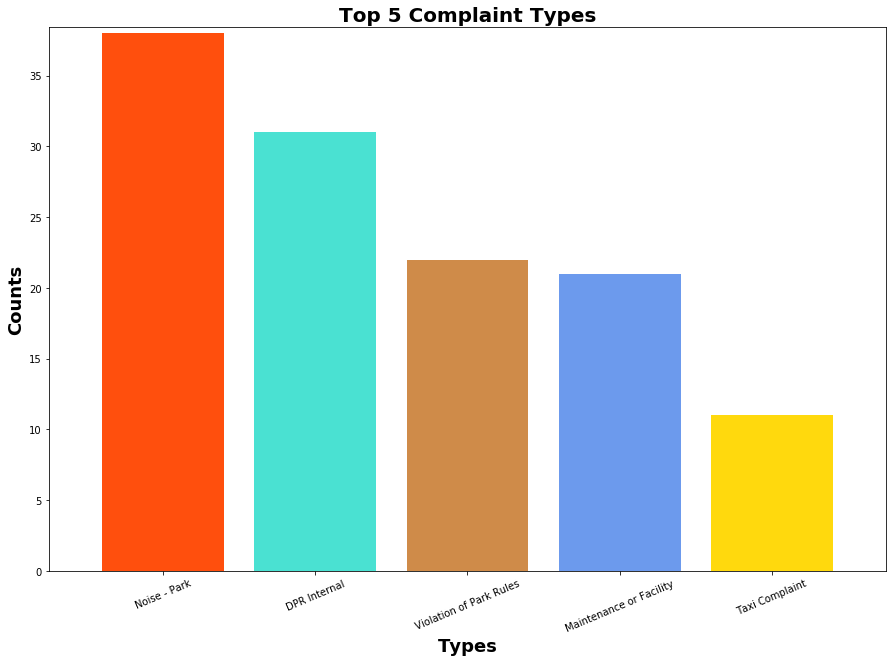

In [5]:
# Make a Bar Graph of the Top 5 Overall Complaint Info
top5types = ["Noise - Park", "DPR Internal", "Violation of Park Rules", "Maintenance or Facility", "Taxi Complaint"]
typecounts = [38, 31, 22, 21, 11]
x_axis = np.arange(len(typecounts))

# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.bar(top5types, typecounts, align="center", color=['orangered', 'turquoise', 'peru', 'cornflowerblue', 'gold'], alpha=0.95)
plt.title("Top 5 Complaint Types", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel("Types", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Counts", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xticks(x_axis, top5types, rotation=23)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(typecounts)+0.4)
plt.show()

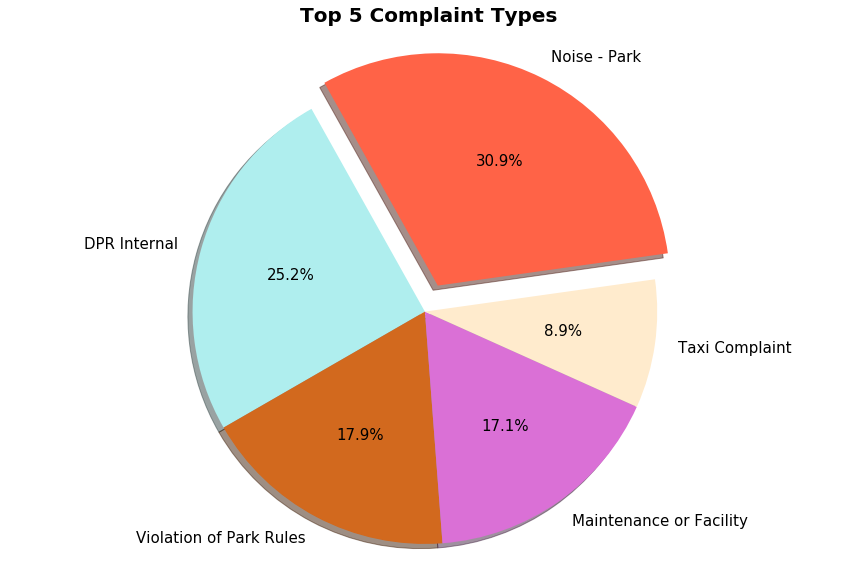

In [6]:
# Yay! Now turn it into a pie chart with %s!
top5types = ["Noise - Park", "DPR Internal", "Violation of Park Rules", 
             "Maintenance or Facility", "Taxi Complaint"]
typecounts = [38, 31, 22, 21, 11]
colors = ["tomato", "paleturquoise", "chocolate", "orchid", "blanchedalmond"]
explode = (0.125,0,0,0,0)

# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.title("Top 5 Complaint Types", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.pie(typecounts, textprops={'fontsize': 15}, explode=explode, labels=top5types, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=8,)
plt.axis("equal")
plt.show()

In [7]:
# Next, we will focus on the # of complaints by Borough
borcomps = the311_pd['Borough'].value_counts().head()
preview_top5_df = pd.DataFrame(borcomps)
preview_top5_df

,Borough
MANHATTAN,74
QUEENS,49
BROOKLYN,37
BRONX,19
STATEN ISLAND,5


In [8]:
# K, now make it an expanded DataFrame
borcomps = borcomps.index.values
borcomps_df = the311_pd.loc[the311_pd['Borough'].isin(borcomps)]
borcomps_df.count()  
borcomps_df

,Unique Key,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Landmark,Borough,Incident Zip,Latitude,Longitude,Location
0,38092317,1/2/2018 9:20,Department of Parks and Recreation,Maintenance or Facility,Structure - Indoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
1,38096256,1/3/2018 13:47,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
2,38108295,1/4/2018 10:17,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
3,38139574,1/7/2018 11:17,Department of Parks and Recreation,Maintenance or Facility,Snow or Ice,Street/Curbside,ISHAM PARK,MANHATTAN,10034,40.87023791,-73.91972817,"(40.87023791438702, -73.91972816874608)"
4,38151954,1/8/2018 10:16,Department of Transportation,Bus Stop Shelter Complaint,Snow Removal Requested,Bus Stop Shelter,KINGSBOROUGH COMMUNITY COLLEGE,BROOKLYN,11235,40.57790383,-73.93535012,"(40.577903827726615, -73.93535012227942)"
5,38162392,1/9/2018 12:37,Taxi and Limousine Commission,Taxi Complaint,Insurance Information Requested,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
6,38188323,1/11/2018 12:13,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
7,38192675,1/12/2018 13:29,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,WASHINGTON SQUARE PARK,MANHATTAN,10011,40.73088313,-73.99759338,"(40.730883132114464, -73.9975933816647)"
8,38191032,1/12/2018 16:11,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,CONEY ISLAND HOSPITAL,BROOKLYN,11235,40.58615127,-73.9655919,"(40.586151272301464, -73.96559189570597)"
9,38215016,1/15/2018 14:18,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"


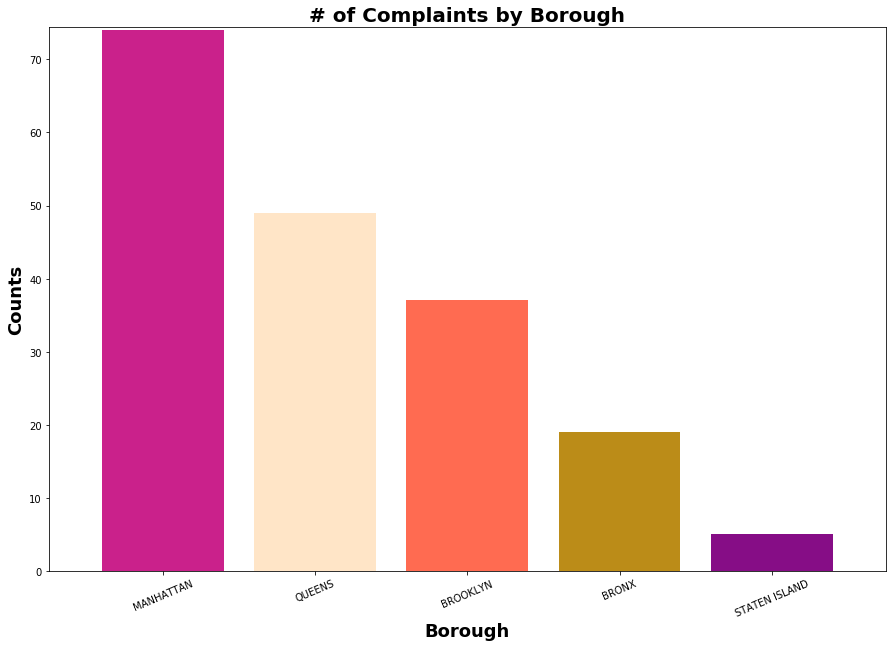

In [9]:
# Make a Bar Graph of the # of Complaints by Borough
boroughs = ["MANHATTAN", "QUEENS", "BROOKLYN", "BRONX", "STATEN ISLAND"]
borcounts = [74, 49, 37, 19, 5]
x_axis = np.arange(len(borcounts))

# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.bar(boroughs, borcounts, align="center", color=['mediumvioletred', 'bisque', 'tomato', 'darkgoldenrod', 'purple'], alpha=0.95)
plt.title("# of Complaints by Borough", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel("Borough", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel("Counts", fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.xticks(x_axis, boroughs, rotation=23)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(borcounts)+0.4)
plt.show()

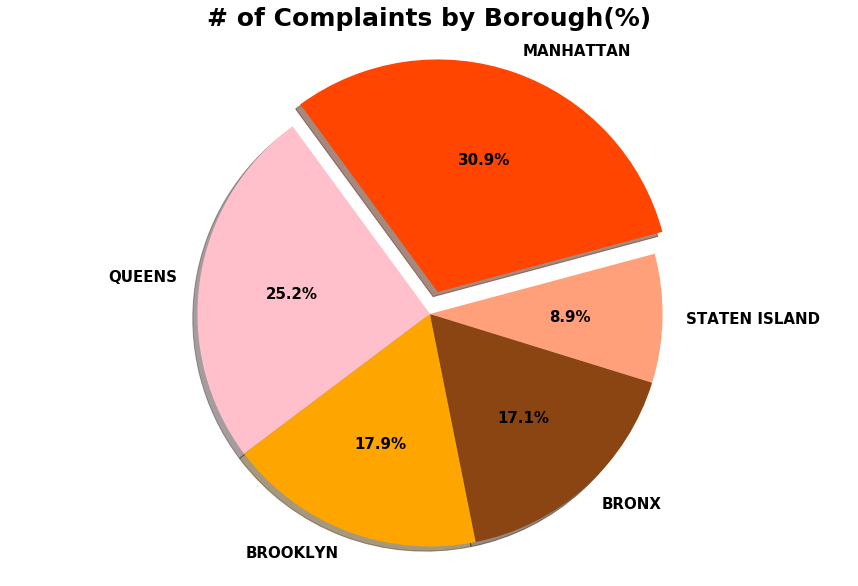

In [10]:
# Yay! Now turn it into a pie chart with %s!
boroughs = ["MANHATTAN", "QUEENS", "BROOKLYN", "BRONX", "STATEN ISLAND"]
borcounts = [74, 49, 37, 19, 5]
colors = ["orangered", "pink", "orange", "saddlebrown", "lightsalmon"]
explode = (0.1,0,0,0,0)

# Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.title("# of Complaints by Borough(%)", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
plt.pie(typecounts, textprops={'fontsize': 15, 'fontweight': 'bold'}, explode=explode, labels=boroughs, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=15,)
plt.axis("equal")
plt.show()

In [11]:
# Next, we will focus on the Top 5 Complaints by Borough
top5_bors_df = top5_comps_df.groupby(['Complaint Type','Borough'])
top5_bors_df = top5_bors_df.count()
top5_bors_df = top5_bors_df.sort_values('Complaint Type', ascending=False)
top5_bors_df

Unique Key  Created Date  Agency Name  \
Complaint Type          Borough                                                
Violation of Park Rules STATEN ISLAND           1             1            1   
                        QUEENS                  6             6            6   
                        MANHATTAN               7             7            7   
                        BROOKLYN                4             4            4   
                        BRONX                   4             4            4   
Taxi Complaint          QUEENS                  9             9            9   
                        MANHATTAN               1             1            1   
                        BROOKLYN                1             1            1   
Noise - Park            QUEENS                  2             2            2   
                        STATEN ISLAND           1             1            1   
                        MANHATTAN              24            24           24   
                        BROOKLYN               10            10           10   
                        BRONX                   1             1            1   
Maintenance or Facility STATEN ISLAND           1             1            1   
                        QUEENS                  3             3            3   
                        MANHATTAN              11            11           11   
                        BROOKLYN                3             3            3   
                        BRONX                   3             3            3   
DPR Internal            BROOKLYN                8             8            8   
                        QUEENS                  7             7            7   
                        MANHATTAN              14            14           14   
                        BRONX                   2             2            2   

                                       Descriptor  Location Type  Landmark  \
Complaint Type          Borough                                              
Violation of Park Rules STATEN ISLAND           1              1         1   
                        QUEENS                  6              6         6   
                        MANHATTAN               7              7         7   
                        BROOKLYN                4              4         4   
                        BRONX                   4              4         4   
Taxi Complaint          QUEENS                  9              9         9   
                        MANHATTAN               1              1         1   
                        BROOKLYN                1              1         1   
Noise - Park            QUEENS                  2              2         2   
                        STATEN ISLAND           1              1         1   
                        MANHATTAN              24             24        24   
                        BROOKLYN               10             10        10   
                        BRONX                   1              1         1   
Maintenance or Facility STATEN ISLAND           1              1         1   
                        QUEENS                  3              3         3   
                        MANHATTAN              11             11        11   
                        BROOKLYN                3              3         3   
                        BRONX                   3              3         3   
DPR Internal            BROOKLYN                8              8         8   
                        QUEENS                  7              7         7   
                        MANHATTAN              14             14        14   
                        BRONX                   2              2         2   

                                       Incident Zip  Latitude  Longitude  \
Complaint Type          Borough                                            
Violation of Park Rules STATEN ISLAND             1         1          1   
                 

In [37]:
# Now prep the data so you can make a graph of Top 5 Complaint Types by Borough

borough_dict = {'Complaint Type': ["Noise - Park", 
                                   "DPR Internal", 
                                   "Violation of Park Rules", 
                                   "Maintenance or Facility", 
                                   "Taxi Complaint"],
               'Manattan Counts': [24, 14, 7, 11, 1],
               'Queens Counts': [2, 7, 6, 3, 9,], 
               'Brooklyn Counts': [10, 8, 4, 3, 1],
               'Bronx Counts': [1, 2, 4, 3, 0],
               'Staten Island Counts': [1, 0, 1, 1, 0]}

compbor_df = pd.DataFrame(borough_dict )
compbor_df 

compbor_dict = {"Boroughs": ["Manhattan", "Queens", "Brooklyn", "Bronx", "Staten Island"],
               "Noise - Park": [24,2,10,1,1],
               "DPR Internal": [14,7,8,2,0],
               "Violation of Park Rules": [7,6,4,4,1],
               "Maintenance or Facility":[11,3,3,3,1],
               "Taxi Complaint": [1,9,1,0,0]}

newcompbor_df = pd.DataFrame(compbor_dict )
newcompbor_df 


,Boroughs,Noise - Park,DPR Internal,Violation of Park Rules,Maintenance or Facility,Taxi Complaint
0,Manhattan,24,14,7,11,1
1,Queens,2,7,6,3,9
2,Brooklyn,10,8,4,3,1
3,Bronx,1,2,4,3,0
4,Staten Island,1,0,1,1,0


In [42]:
cbx_axis = np.arange(len(newcompbor_df))
cbx_axis

array([0, 1, 2, 3, 4])

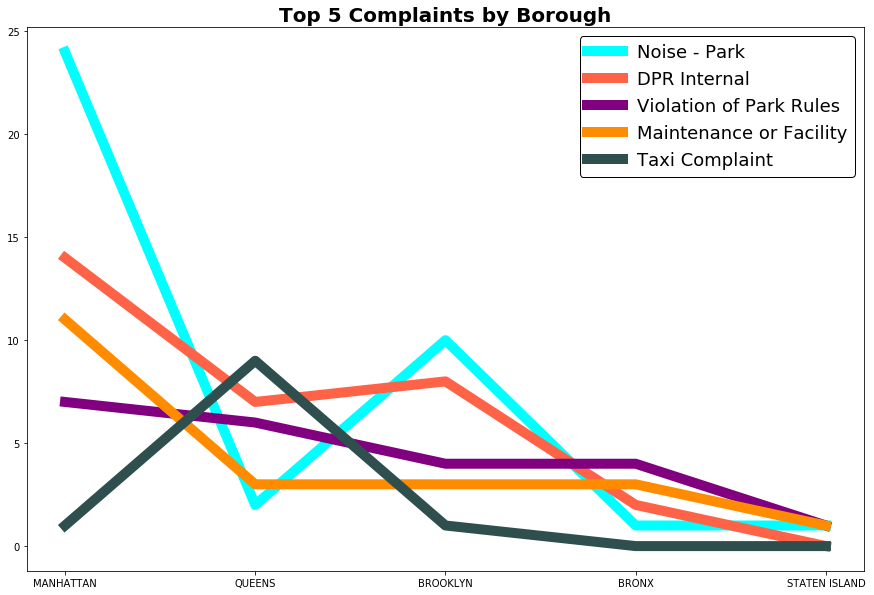

In [48]:
#Now, make a graph 
noipar = [24,2,10,1,1]
dprint = [14,7,8,2,0]
viopkru = [7,6,4,4,1]
maintfac = [11,3,3,3,1]
taxicomp = [1,9,1,0,0]
plt.figure(figsize = (15,10))
plt.title("Top 5 Complaints by Borough", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
noise_park, = plt.plot(boroughs, noipar, color='Aqua', linewidth= 10.0, label = 'Noise - Park')
dpr_internal, = plt.plot(boroughs, dprint, color='tomato', linewidth= 10.0, label = 'DPR Internal')
vio_parkrules, = plt.plot(boroughs, viopkru, color='purple', linewidth= 10.0, label = 'Violation of Park Rules')
maintfac, = plt.plot(boroughs, maintfac, color='darkorange',linewidth= 10.0, label = 'Maintenance or Facility')
taxi_comp, = plt.plot(boroughs, taxicomp, color='darkslategray', linewidth= 10.0, label = 'Taxi Complaint') 

compborleg = plt.legend(numpoints = 1, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'k', 
                fontsize = '18', 
                framealpha = 1)
plt.show()


In [50]:
# Next, Top 5 Complaint Descriptors by Borough
top5_descs = the311_pd['Descriptor'].value_counts().head()
preview_top5_df = pd.DataFrame(top5_descs)
preview_top5_df

,Descriptor
Loud Music/Party,36
Aided/Injury,22
Structure - Outdoors,12
Obstructing Public Use,11
Driver Complaint,9


In [51]:
# K, now expand that DataFrame, hunnay
top5_descs = top5_descs.index.values
top5_descs_df = the311_pd.loc[the311_pd['Descriptor'].isin(top5_descs)]
top5_descs_df.count()  
top5_descs_df  

,Unique Key,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Landmark,Borough,Incident Zip,Latitude,Longitude,Location
1,38096256,1/3/2018 13:47,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
2,38108295,1/4/2018 10:17,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
6,38188323,1/11/2018 12:13,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
7,38192675,1/12/2018 13:29,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,WASHINGTON SQUARE PARK,MANHATTAN,10011,40.73088313,-73.99759338,"(40.730883132114464, -73.9975933816647)"
8,38191032,1/12/2018 16:11,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,CONEY ISLAND HOSPITAL,BROOKLYN,11235,40.58615127,-73.9655919,"(40.586151272301464, -73.96559189570597)"
9,38215016,1/15/2018 14:18,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
13,38271358,1/21/2018 15:28,Department of Parks and Recreation,Violation of Park Rules,Obstructing Public Use,Park,FLUSHING MEADOWS CORONA PARK,QUEENS,11368,40.74237706,-73.84215698,"(40.742377064999275, -73.84215697754966)"
15,38321073,1/27/2018 12:45,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
16,38332354,1/29/2018 8:05,Taxi and Limousine Commission,For Hire Vehicle Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
18,38345509,1/30/2018 11:08,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,DEVOE PARK,BRONX,10468,40.8631302,-73.90654452,"(40.863130202365284, -73.90654451754935)"


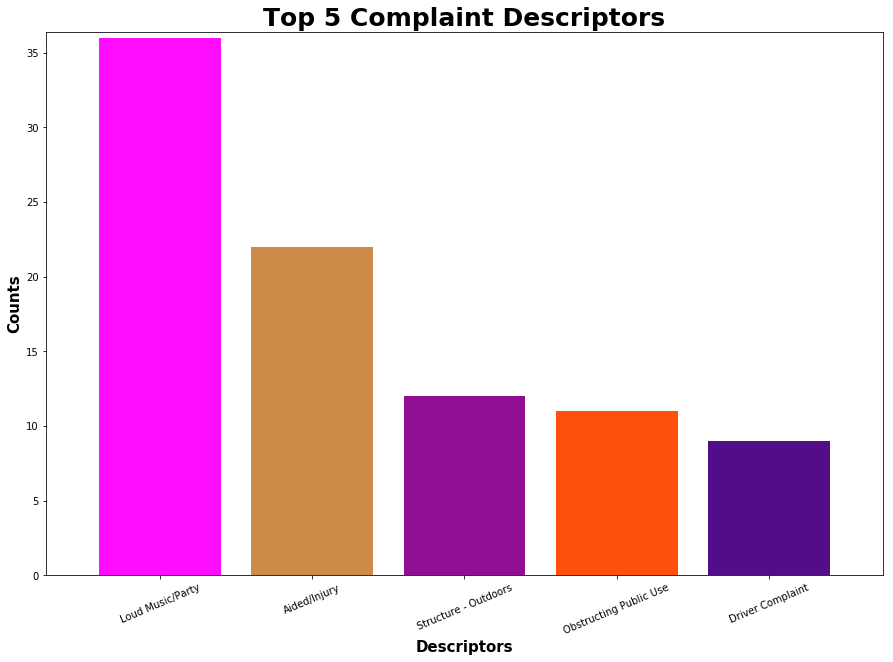

In [52]:
# Make a Bar Graph of the Top 5 Complaint Descriptors
desctypes = ["Loud Music/Party", "Aided/Injury", "Structure - Outdoors", "Obstructing Public Use", "Driver Complaint"]
typecounts = [36, 22, 12, 11, 9]
x_axis = np.arange(len(typecounts))

# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.bar(desctypes, typecounts, align="center", color=['Fuchsia', 
                                                     'peru', 
                                                     'darkmagenta', 
                                                     'orangered',
                                                     'indigo'], alpha=0.95)
plt.title("Top 5 Complaint Descriptors", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
plt.xlabel("Descriptors", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel("Counts", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.xticks(x_axis, desctypes, rotation=23)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(typecounts)+0.4)
plt.show()

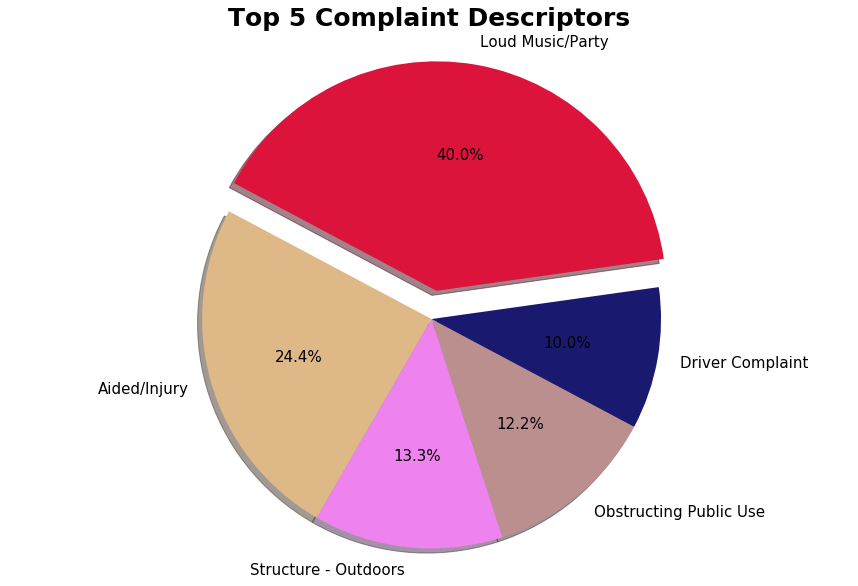

In [53]:
# Yay! Now turn it into a pie chart with %s!
desctypes = ["Loud Music/Party", "Aided/Injury", "Structure - Outdoors", "Obstructing Public Use", "Driver Complaint"]
typecounts = [36, 22, 12, 11, 9]
colors = ["crimson", "burlywood", "violet", "rosybrown", "midnightblue"]
explode = (0.125,0,0,0,0)

# Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.title("Top 5 Complaint Descriptors", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
plt.pie(typecounts, textprops={'fontsize': 15}, explode=explode, labels=desctypes, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=8,)
plt.axis("equal")
plt.show()

In [54]:
# K, now prep and plot a line graph for Top 5 Descriptors by Borough
top5_descs_df = top5_descs_df.groupby(['Descriptor','Borough'])
top5_descs_df = top5_descs_df.count()
top5_descs_df = top5_descs_df.sort_values('Descriptor', ascending=False)
top5_descs_df  

Unique Key  Created Date  Agency Name  \
Descriptor             Borough                                                
Structure - Outdoors   STATEN ISLAND           1             1            1   
                       QUEENS                  1             1            1   
                       MANHATTAN               5             5            5   
                       BROOKLYN                3             3            3   
                       BRONX                   2             2            2   
Obstructing Public Use BRONX                   3             3            3   
                       QUEENS                  3             3            3   
                       MANHATTAN               3             3            3   
                       BROOKLYN                2             2            2   
Loud Music/Party       STATEN ISLAND           1             1            1   
                       QUEENS                  2             2            2   
                       MANHATTAN              23            23           23   
                       BROOKLYN                9             9            9   
                       BRONX                   1             1            1   
Driver Complaint       QUEENS                  8             8            8   
                       BROOKLYN                1             1            1   
Aided/Injury           BROOKLYN                5             5            5   
                       QUEENS                  7             7            7   
                       MANHATTAN               8             8            8   
                       BRONX                   2             2            2   

                                      Complaint Type  Location Type  Landmark  \
Descriptor             Borough                                                  
Structure - Outdoors   STATEN ISLAND               1              1         1   
                       QUEENS                      1              1         1   
                       MANHATTAN                   5              5         5   
                       BROOKLYN                    3              3         3   
                       BRONX                       2              2         2   
Obstructing Public Use BRONX                       3              3         3   
                       QUEENS                      3              3         3   
                       MANHATTAN                   3              3         3   
                       BROOKLYN                    2              2         2   
Loud Music/Party       STATEN ISLAND               1              1         1   
                       QUEENS                      2              2         2   
                       MANHATTAN                  23             23        23   
                       BROOKLYN                    9              9         9   
                       BRONX                       1              1         1   
Driver Complaint       QUEENS                      8              8         8   
                       BROOKLYN                    1              1         1   
Aided/Injury           BROOKLYN                    5              5         5   
                       QUEENS                      7              7         7   
                       MANHATTAN                   8              8         8   
                       BRONX                       2              2         2   

                                      Incident Zip  Latitude  Longitude  \
Descriptor             Borough                                            
Structure - Outdoors   STATEN ISLAND             1         1          1   
                       QUEENS                    1         1          1   
                       MANHATTAN                 5         5          5   
                       BROOKLYN                  3         3          3   
                       BRONX                     2         2      

In [55]:
# Next, make a dictionary into a DataFrame...it will help with plotting yo graph, mmmk?

descbor_dict = {"Boroughs": ["Manhattan", "Queens", "Brooklyn", "Bronx", "Staten Island"],
               "Structure - Outdoors": [5,1,3,2,1],
               "Obstructing Public Use": [3,3,2,3,0],
               "Loud Music/Party": [23,2,9,1,1],
               "Driver Complaint":[0,8,1,0,0],
               "Aided/Injury": [8,7,5,2,0]}

newdescbor_df = pd.DataFrame(descbor_dict )
newdescbor_df 

,Boroughs,Structure - Outdoors,Obstructing Public Use,Loud Music/Party,Driver Complaint,Aided/Injury
0,Manhattan,5,3,23,0,8
1,Queens,1,3,2,8,7
2,Brooklyn,3,2,9,1,5
3,Bronx,2,3,1,0,2
4,Staten Island,1,0,1,0,0


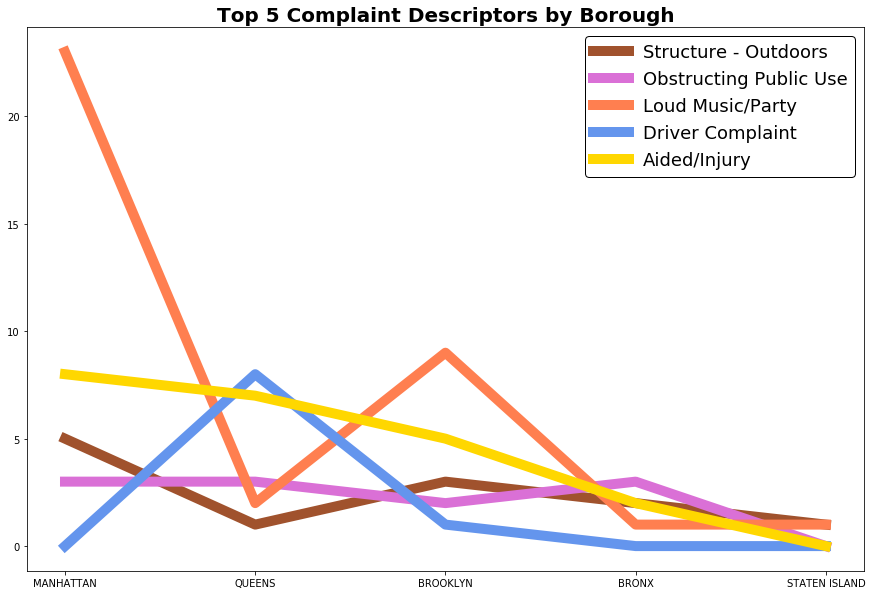

In [58]:
#Now, make a graph 
structout = [5,1,3,2,1]
obpubuse = [3,3,2,3,0]
ldmuspart = [23,2,9,1,1]
drivcomp = [0,8,1,0,0]
aidinj = [8,7,5,2,0]
plt.figure(figsize = (15,10))
plt.title("Top 5 Complaint Descriptors by Borough", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
struct_out, = plt.plot(boroughs, structout, color='sienna', linewidth= 10.0, label = 'Structure - Outdoors')
obstpub_use, = plt.plot(boroughs, obpubuse, color='orchid', linewidth= 10.0, label = 'Obstructing Public Use')
ldmus_part, = plt.plot(boroughs, ldmuspart, color='coral', linewidth= 10.0, label = 'Loud Music/Party')
driv_comp, = plt.plot(boroughs, drivcomp, color='cornflowerblue',linewidth= 10.0, label = 'Driver Complaint')
aid_inj, = plt.plot(boroughs, aidinj, color='gold', linewidth= 10.0, label = 'Aided/Injury') 

compborleg = plt.legend(numpoints = 1, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'k', 
                fontsize = '18', 
                framealpha = 1)
plt.show()

In [59]:
# Next, Top 5 Landmarks by Borough
top5_land = the311_pd['Landmark'].value_counts().head()
preview_top5_df = pd.DataFrame(top5_land)
preview_top5_df

,Landmark
CENTRAL PARK,29
LA GUARDIA AIRPORT,11
J F K AIRPORT,10
UNION SQUARE PARK,9
PROSPECT PARK,8


In [60]:
# K, now expand that DataFrame, hunnay
top5_land = top5_land.index.values
top5_land_df = the311_pd.loc[the311_pd['Landmark'].isin(top5_land)]
top5_land_df.count()  
top5_land_df

,Unique Key,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Landmark,Borough,Incident Zip,Latitude,Longitude,Location
0,38092317,1/2/2018 9:20,Department of Parks and Recreation,Maintenance or Facility,Structure - Indoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
1,38096256,1/3/2018 13:47,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
2,38108295,1/4/2018 10:17,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
5,38162392,1/9/2018 12:37,Taxi and Limousine Commission,Taxi Complaint,Insurance Information Requested,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
6,38188323,1/11/2018 12:13,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
9,38215016,1/15/2018 14:18,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
11,38257035,1/19/2018 7:24,New York City Police Department,Traffic,Congestion/Gridlock,Street/Sidewalk,J F K AIRPORT,QUEENS,11430,40.64832049,-73.78828125,"(40.64832048620134, -73.78828125130184)"
15,38321073,1/27/2018 12:45,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
16,38332354,1/29/2018 8:05,Taxi and Limousine Commission,For Hire Vehicle Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
17,38337395,1/29/2018 13:16,Taxi and Limousine Commission,Taxi Complaint,Insurance Information Requested,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"


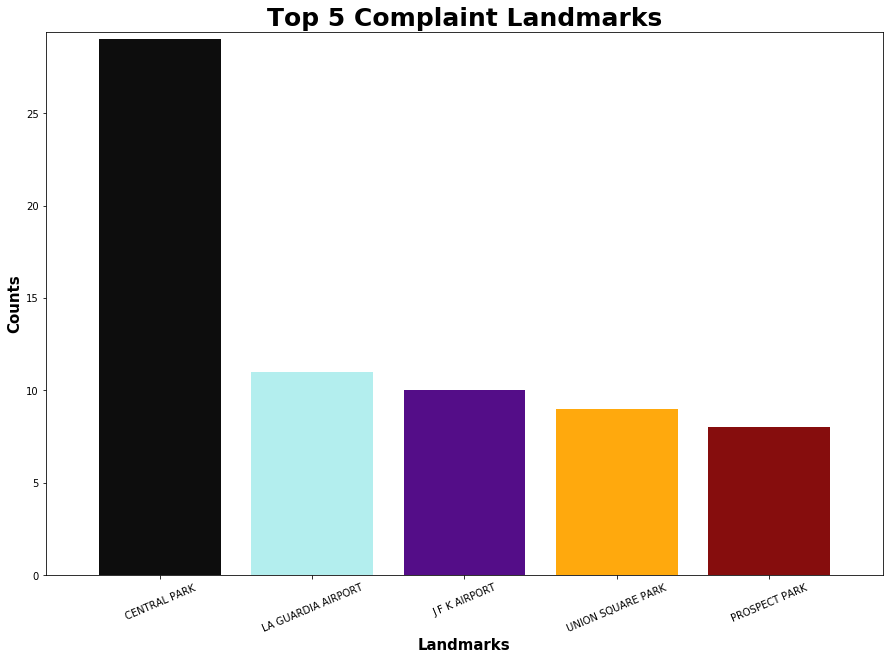

In [62]:
# Make a Bar Graph of the Top 5 Landmarks
landtypes = ["CENTRAL PARK", "LA GUARDIA AIRPORT", "J F K AIRPORT", "UNION SQUARE PARK", "PROSPECT PARK"]
typecounts = [29, 11, 10, 9, 8]
x_axis = np.arange(len(typecounts))

# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.bar(landtypes, typecounts, align="center", color=['black', 
                                                     'paleturquoise', 
                                                     'indigo', 
                                                     'orange',
                                                     'maroon'], alpha=0.95)
plt.title("Top 5 Complaint Landmarks", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
plt.xlabel("Landmarks", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel("Counts", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.xticks(x_axis, landtypes, rotation=23)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(typecounts)+0.4)
plt.show()

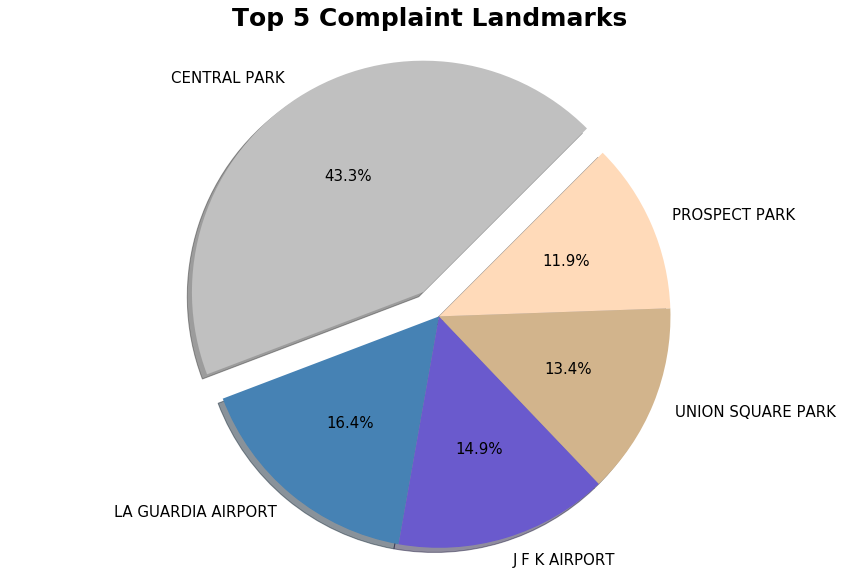

In [65]:
# Yay! Now turn it into a pie chart with %s!
landtypes = ["CENTRAL PARK", "LA GUARDIA AIRPORT", "J F K AIRPORT", "UNION SQUARE PARK", "PROSPECT PARK"]
typecounts = [29, 11, 10, 9, 8]
colors = ["silver", "steelblue", "slateblue", "tan", "peachpuff"]
explode = (0.125,0,0,0,0)

# Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.title("Top 5 Complaint Landmarks", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
plt.pie(typecounts, textprops={'fontsize': 15}, explode=explode, labels=landtypes, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=45,)
plt.axis("equal")
plt.show()

In [66]:
# K, now prep and plot a line graph for Top 5 Complaint Landmarks by Borough
top5_land_df = top5_land_df.groupby(['Landmark','Borough'])
top5_land_df = top5_land_df.count()
top5_land_df = top5_land_df.sort_values('Landmark', ascending=False)
top5_land_df

Unique Key  Created Date  Agency Name  \
Landmark           Borough                                              
UNION SQUARE PARK  MANHATTAN             9             9            9   
PROSPECT PARK      BROOKLYN              8             8            8   
LA GUARDIA AIRPORT QUEENS               11            11           11   
J F K AIRPORT      QUEENS                9             9            9   
                   Unspecified           1             1            1   
CENTRAL PARK       MANHATTAN            28            28           28   
                   Unspecified           1             1            1   

                                Complaint Type  Descriptor  Location Type  \
Landmark           Borough                                                  
UNION SQUARE PARK  MANHATTAN                 9           9              9   
PROSPECT PARK      BROOKLYN                  8           8              8   
LA GUARDIA AIRPORT QUEENS                   11          11             11   
J F K AIRPORT      QUEENS                    9           9              9   
                   Unspecified               1           1              1   
CENTRAL PARK       MANHATTAN                28          28             28   
                   Unspecified               1           1              1   

                                Incident Zip  Latitude  Longitude  Location  
Landmark           Borough                                                   
UNION SQUARE PARK  MANHATTAN               9         9          9         9  
PROSPECT PARK      BROOKLYN                8         8          8         8  
LA GUARDIA AIRPORT QUEENS                 11        11         11        11  
J F K AIRPORT      QUEENS                  9         9          9         9  
                   Unspecified             1         1          1         1  
CENTRAL PARK       MANHATTAN              28        28         28        28  
                   Unspecified             1         1          1         1

In [69]:
# Next, make a dictionary into a DataFrame...it will help with plotting yo graph, mmmk?

landbor_dict = {"Boroughs": ["Manhattan", "Queens", "Brooklyn", "Bronx", "Staten Island"],
               "UNION SQUARE PARK": [9,0,0,0,0],
               "PROSPECT PARK": [0,0,8,0,0],
               "LA GUARDIA AIRPORT": [0,11,0,0,0],
               "J F K AIRPORT":[0,9,0,0,0],
               "CENTRAL PARK": [28,0,0,0,0]}

landbor_dict_df = pd.DataFrame(landbor_dict )
landbor_dict_df 

,Boroughs,UNION SQUARE PARK,PROSPECT PARK,LA GUARDIA AIRPORT,J F K AIRPORT,CENTRAL PARK
0,Manhattan,9,0,0,0,28
1,Queens,0,0,11,9,0
2,Brooklyn,0,8,0,0,0
3,Bronx,0,0,0,0,0
4,Staten Island,0,0,0,0,0


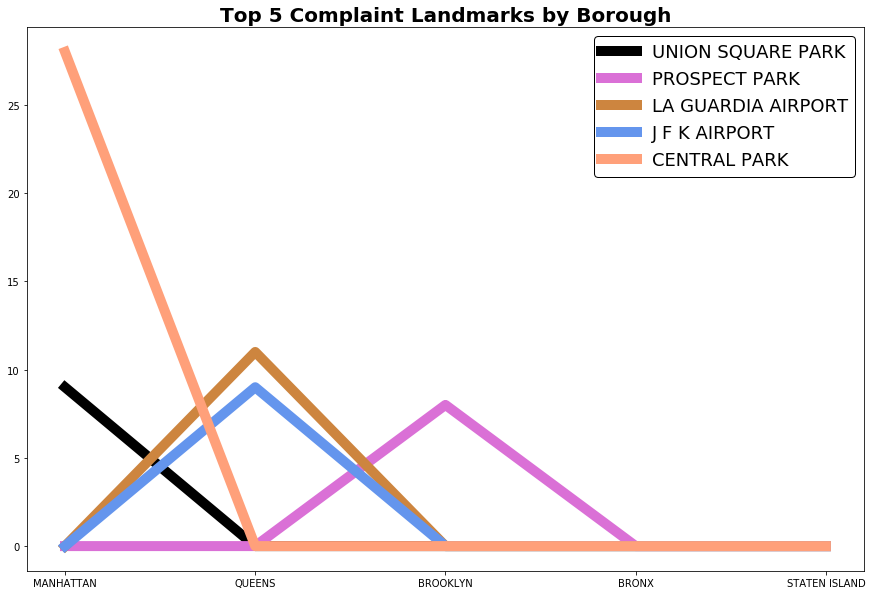

In [72]:
#Now, make a graph 
unsqpk = [9,0,0,0,0]
prospk = [0,0,8,0,0]
lgairport = [0,11,0,0,0]
jfkairport = [0,9,0,0,0]
centpk = [28,0,0,0,0]
plt.figure(figsize = (15,10))
plt.title("Top 5 Complaint Landmarks by Borough", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
unsq_park, = plt.plot(boroughs, unsqpk, color='black', linewidth= 10.0, label = 'UNION SQUARE PARK')
pros_park, = plt.plot(boroughs, prospk, color='orchid', linewidth= 10.0, label = 'PROSPECT PARK')
lga_arpt, = plt.plot(boroughs, lgairport, color='peru', linewidth= 10.0, label = 'LA GUARDIA AIRPORT')
kfk_arpt, = plt.plot(boroughs, jfkairport, color='cornflowerblue',linewidth= 10.0, label = 'J F K AIRPORT')
cent_park, = plt.plot(boroughs, centpk, color='lightsalmon', linewidth= 10.0, label = 'CENTRAL PARK') 

compborleg = plt.legend(numpoints = 1, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'k', 
                fontsize = '18', 
                framealpha = 1)
plt.show()

In [76]:
# Next, Top 5 Location Types by Borough
top5_loc = the311_pd['Location Type'].value_counts().head()
preview_top5_df = pd.DataFrame(top5_loc)
preview_top5_df

,Location Type
Park,65
Park/Playground,43
Street/Sidewalk,29
Street,21
Street/Curbside,11


In [77]:
# K, now expand that DataFrame, hunnay
top5_loc = top5_loc.index.values
top5_loc_df = the311_pd.loc[the311_pd['Location Type'].isin(top5_loc)]
top5_loc_df.count()  
top5_loc_df

,Unique Key,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Landmark,Borough,Incident Zip,Latitude,Longitude,Location
0,38092317,1/2/2018 9:20,Department of Parks and Recreation,Maintenance or Facility,Structure - Indoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
1,38096256,1/3/2018 13:47,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
2,38108295,1/4/2018 10:17,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
3,38139574,1/7/2018 11:17,Department of Parks and Recreation,Maintenance or Facility,Snow or Ice,Street/Curbside,ISHAM PARK,MANHATTAN,10034,40.87023791,-73.91972817,"(40.87023791438702, -73.91972816874608)"
5,38162392,1/9/2018 12:37,Taxi and Limousine Commission,Taxi Complaint,Insurance Information Requested,Street,LA GUARDIA AIRPORT,QUEENS,11369,40.77442087,-73.87729411,"(40.77442086598845, -73.87729410513894)"
6,38188323,1/11/2018 12:13,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
7,38192675,1/12/2018 13:29,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,WASHINGTON SQUARE PARK,MANHATTAN,10011,40.73088313,-73.99759338,"(40.730883132114464, -73.9975933816647)"
8,38191032,1/12/2018 16:11,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,CONEY ISLAND HOSPITAL,BROOKLYN,11235,40.58615127,-73.9655919,"(40.586151272301464, -73.96559189570597)"
9,38215016,1/15/2018 14:18,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,CENTRAL PARK,MANHATTAN,10000,40.78229521,-73.96519444,"(40.782295208794295, -73.96519444362545)"
11,38257035,1/19/2018 7:24,New York City Police Department,Traffic,Congestion/Gridlock,Street/Sidewalk,J F K AIRPORT,QUEENS,11430,40.64832049,-73.78828125,"(40.64832048620134, -73.78828125130184)"


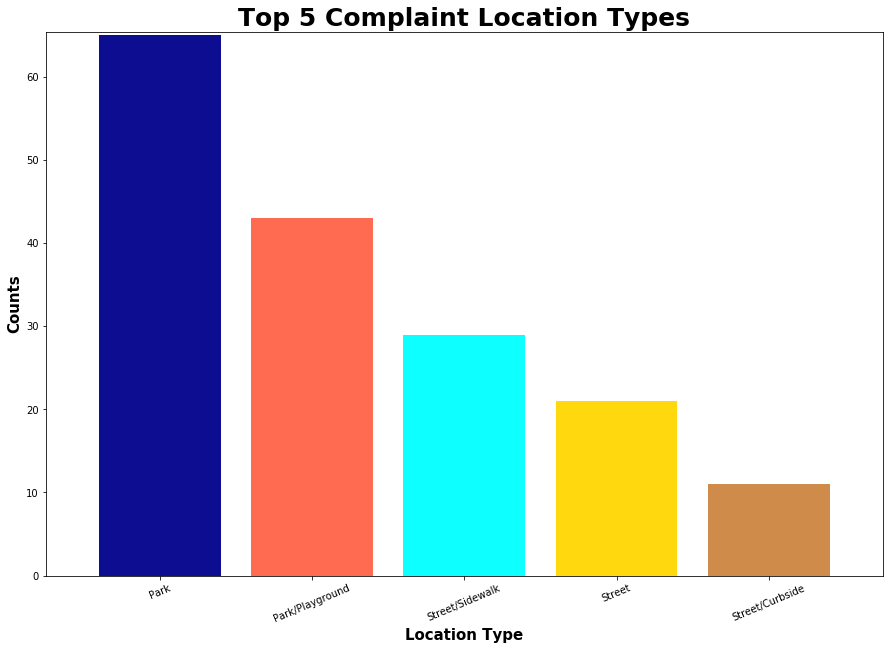

In [78]:
# Make a Bar Graph of the Top 5 Complaint Location Types
loctypes = ["Park", "Park/Playground", "Street/Sidewalk", "Street", "Street/Curbside"]
typecounts = [65, 43, 29, 21, 11]
x_axis = np.arange(len(typecounts))

# # Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.bar(loctypes, typecounts, align="center", color=['darkblue', 
                                                     'tomato', 
                                                     'aqua', 
                                                     'gold',
                                                     'peru'], alpha=0.95)
plt.title("Top 5 Complaint Location Types", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
plt.xlabel("Location Type", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel("Counts", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.xticks(x_axis, loctypes, rotation=23)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(typecounts)+0.4)
plt.show()

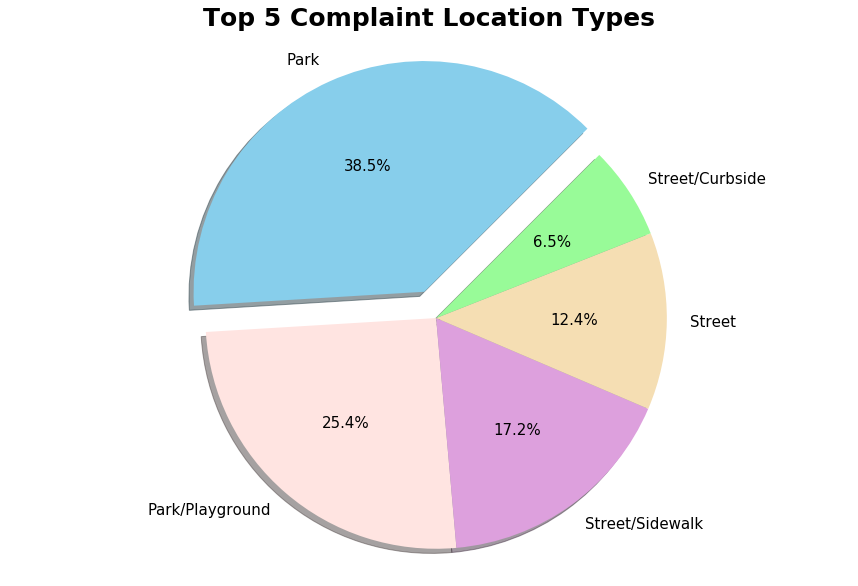

In [83]:
# Yay! Now turn it into a pie chart with %s!
loctypes = ["Park", "Park/Playground", "Street/Sidewalk", "Street", "Street/Curbside"]
typecounts = [65, 43, 29, 21, 11]
colors = ["skyblue", "mistyrose", "plum", "wheat", "palegreen"]
explode = (0.125,0,0,0,0)

# Plot that graph and make it nice, mmmk?
plt.figure(figsize = (15,10))
plt.title("Top 5 Complaint Location Types", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
plt.pie(typecounts, textprops={'fontsize': 15}, explode=explode, labels=loctypes, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=45,)
plt.axis("equal")
plt.show()

In [84]:
# K, now prep and plot a line graph for Top 5 Complaint Landmarks by Borough
top5_loc_df = top5_loc_df.groupby(['Location Type','Borough'])
top5_loc_df = top5_loc_df.count()
top5_loc_df = top5_loc_df.sort_values('Location Type', ascending=False)
top5_loc_df

Unique Key  Created Date  Agency Name  \
Location Type   Borough                                                
Street/Sidewalk STATEN ISLAND           1             1            1   
                QUEENS                 11            11           11   
                MANHATTAN               6             6            6   
                BROOKLYN                7             7            7   
                BRONX                   4             4            4   
Street/Curbside QUEENS                  3             3            3   
                MANHATTAN               6             6            6   
                BROOKLYN                2             2            2   
Street          MANHATTAN               2             2            2   
                QUEENS                 14            14           14   
                BROOKLYN                2             2            2   
                BRONX                   3             3            3   
Park/Playground STATEN ISLAND           1             1            1   
                QUEENS                  2             2            2   
                MANHATTAN              29            29           29   
                BROOKLYN               10            10           10   
                BRONX                   1             1            1   
Park            BROOKLYN               15            15           15   
                STATEN ISLAND           3             3            3   
                QUEENS                 11            11           11   
                MANHATTAN              27            27           27   
                BRONX                   9             9            9   

                               Complaint Type  Descriptor  Landmark  \
Location Type   Borough                                               
Street/Sidewalk STATEN ISLAND               1           1         1   
                QUEENS                     11          11        11   
                MANHATTAN                   6           6         6   
                BROOKLYN                    7           7         7   
                BRONX                       4           4         4   
Street/Curbside QUEENS                      3           3         3   
                MANHATTAN                   6           6         6   
                BROOKLYN                    2           2         2   
Street          MANHATTAN                   2           2         2   
                QUEENS                     14          14        14   
                BROOKLYN                    2           2         2   
                BRONX                       3           3         3   
Park/Playground STATEN ISLAND               1           1         1   
                QUEENS                      2           2         2   
                MANHATTAN                  29          29        29   
                BROOKLYN                   10          10        10   
                BRONX                       1           1         1   
Park            BROOKLYN                   15          15        15   
                STATEN ISLAND               3           3         3   
                QUEENS                     11          11        11   
                MANHATTAN                  27          27        27   
                BRONX                       9           9         9   

                               Incident Zip  Latitude  Longitude  Location  
Location Type   Borough                                                     
Street/Sidewalk STATEN ISLAND             1         1          1         1  
                QUEENS                   11        11         11        11  
                MANHATTAN                 6         6          6         6  
                BROOKLYN                  7         7          7         7  
                BRONX                     4         4          4         4  
Street/Curbside QUEENS                    3         3     

In [86]:
# Next, make a dictionary into a DataFrame...it will help with plotting yo graph, mmmk?

loctype_dict = {"Boroughs": ["Manhattan", "Queens", "Brooklyn", "Bronx", "Staten Island"],
               "Park": [27,11,15,9,3],
               "Park/Playground": [29,2,10,1,1],
               "Street/Sidewalk": [6,11,7,4,1],
               "Street":[2,14,2,3,0],
               "Street/Curbside": [6,3,2,0,0]}

loctype_dict_df = pd.DataFrame(loctype_dict )
loctype_dict_df 

,Boroughs,Park,Park/Playground,Street/Sidewalk,Street,Street/Curbside
0,Manhattan,27,29,6,2,6
1,Queens,11,2,11,14,3
2,Brooklyn,15,10,7,2,2
3,Bronx,9,1,4,3,0
4,Staten Island,3,1,1,0,0


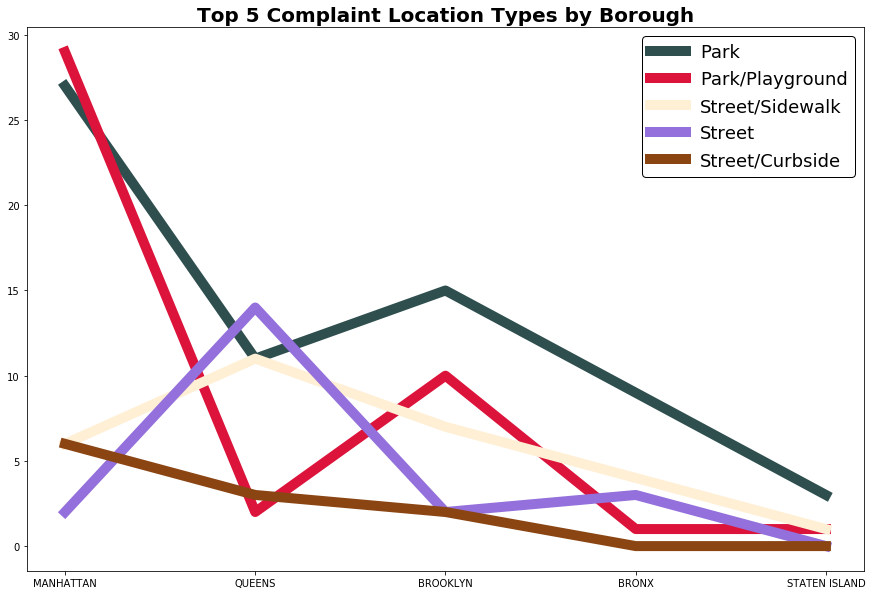

In [88]:
#Now, make a graph 
park = [27,11,15,9,3]
parkplay = [29,2,10,1,1]
streetside = [6,11,7,4,1]
street = [2,14,2,3,0]
streetcurb = [6,3,2,0,0]
plt.figure(figsize = (15,10))
plt.title("Top 5 Complaint Location Types by Borough", fontdict = {'fontsize': 20, 'fontweight': 'bold'})
park_park, = plt.plot(boroughs, park, color='darkslategray', linewidth= 10.0, label = 'Park')
park_play, = plt.plot(boroughs, parkplay , color='crimson', linewidth= 10.0, label = 'Park/Playground')
street_side, = plt.plot(boroughs, streetside, color='papayawhip', linewidth= 10.0, label = 'Street/Sidewalk')
street_street, = plt.plot(boroughs, street, color='mediumpurple',linewidth= 10.0, label = 'Street')
street_curb, = plt.plot(boroughs, streetcurb, color='saddlebrown', linewidth= 10.0, label = 'Street/Curbside') 

compborleg = plt.legend(numpoints = 1, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'k', 
                fontsize = '18', 
                framealpha = 1)
plt.show()

<BarContainer object of 123 artists>

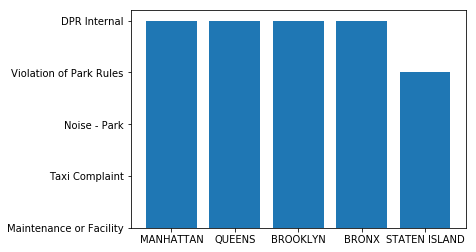

In [15]:
# plt.bar(top5_comps_df['Borough'],top5_comps_df['Complaint Type'])